In [ ]:
pip install extra-keras-datasets

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models, utils, datasets, callbacks
from extra_keras_datasets import emnist

In [ ]:
# reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# **MNIST Dataset**

In [ ]:
# 1. Load MNIST
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

# 2. Preprocess
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# add channel dim
x_train = np.expand_dims(x_train, -1)  # (N, 28, 28, 1)
x_test = np.expand_dims(x_test, -1)

# one-hot labels
num_classes = 10
y_train_cat = utils.to_categorical(y_train, num_classes)
y_test_cat = utils.to_categorical(y_test, num_classes)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# 3. Model definition
def create_model(input_shape=(28,28,1), num_classes=10):
    model = models.Sequential([
        layers.Input(shape=input_shape),
        layers.Conv2D(32, (3,3), activation="relu", padding="same"),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64, (3,3), activation="relu", padding="same"),
        layers.MaxPooling2D((2,2)),
        layers.Flatten(),
        layers.Dense(128, activation="relu"),
        layers.Dropout(0.4),
        layers.Dense(num_classes, activation="softmax")
    ])
    return model

model = create_model()
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 421,642 (1.61 MB)

 Trainable params: 421,642 (1.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 4. Compile
model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

# 5. Train
es = callbacks.EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True, verbose=1)
history = model.fit(
    x_train, y_train_cat,
    validation_split=0.1,
    epochs=10,
    batch_size=128,
    callbacks=[es],
    verbose=2
)

Epoch 1/10
422/422 - 10s - 23ms/step - accuracy: 0.9212 - loss: 0.2595 - val_accuracy: 0.9832 - val_loss: 0.0561
Epoch 2/10
422/422 - 2s - 4ms/step - accuracy: 0.9764 - loss: 0.0770 - val_accuracy: 0.9892 - val_loss: 0.0417
Epoch 3/10
422/422 - 2s - 4ms/step - accuracy: 0.9829 - loss: 0.0532 - val_accuracy: 0.9892 - val_loss: 0.0389
Epoch 4/10
422/422 - 2s - 5ms/step - accuracy: 0.9863 - loss: 0.0429 - val_accuracy: 0.9897 - val_loss: 0.0368
Epoch 5/10
422/422 - 2s - 5ms/step - accuracy: 0.9880 - loss: 0.0362 - val_accuracy: 0.9898 - val_loss: 0.0329
Epoch 6/10
422/422 - 2s - 4ms/step - accuracy: 0.9907 - loss: 0.0305 - val_accuracy: 0.9917 - val_loss: 0.0327
Epoch 7/10
422/422 - 2s - 4ms/step - accuracy: 0.9915 - loss: 0.0263 - val_accuracy: 0.9912 - val_loss: 0.0293
Epoch 8/10
422/422 - 2s - 4ms/step - accuracy: 0.9922 - loss: 0.0232 - val_accuracy: 0.9910 - val_loss: 0.0347
Epoch 9/10
422/422 - 2s - 5ms/step - accuracy: 0.9934 - loss: 0.0197 - val_accuracy: 0.9937 - val_loss: 0.0302

In [ ]:
# 6. Evaluate
test_loss, test_acc = model.evaluate(x_test, y_test_cat, verbose=0)
print(f"\nTest accuracy: {test_acc:.4f}  |  Test loss: {test_loss:.4f}")


Test accuracy: 0.9916  |  Test loss: 0.0254


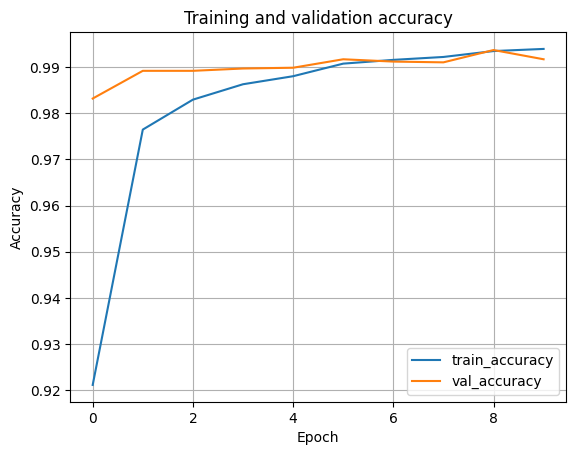

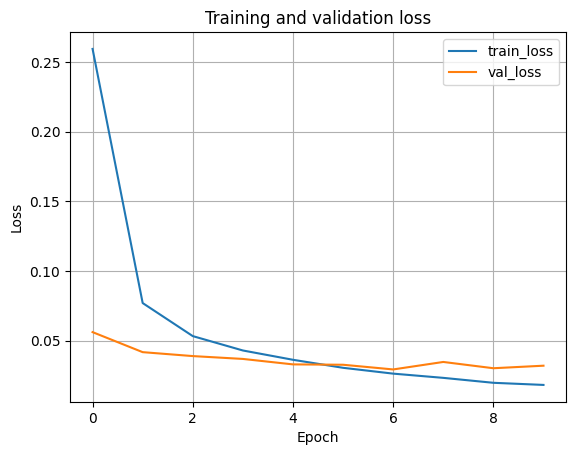

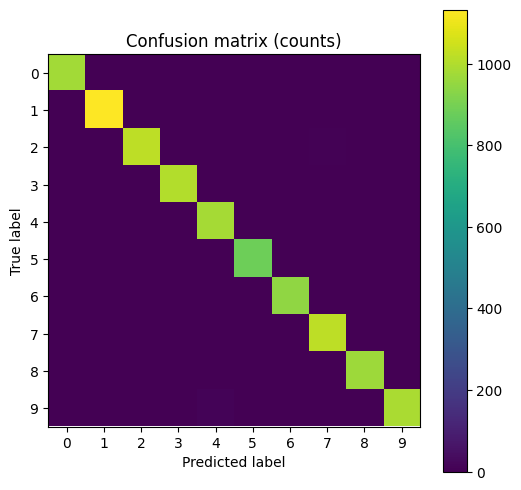

In [ ]:
# 7. Training curves (accuracy)
plt.figure()
plt.plot(history.history["accuracy"], label="train_accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# 8. Training curves (loss)
plt.figure()
plt.plot(history.history["loss"], label="train_loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.title("Training and validation loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

# 9. Confusion matrix
y_pred_probs = model.predict(x_test, verbose=0)
y_pred = np.argmax(y_pred_probs, axis=1)

conf_mat = tf.math.confusion_matrix(y_test, y_pred, num_classes=num_classes).numpy()

plt.figure(figsize=(6,6))
plt.imshow(conf_mat, interpolation="nearest")
plt.title("Confusion matrix (counts)")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.colorbar()
plt.xticks(np.arange(num_classes))
plt.yticks(np.arange(num_classes))
plt.show()

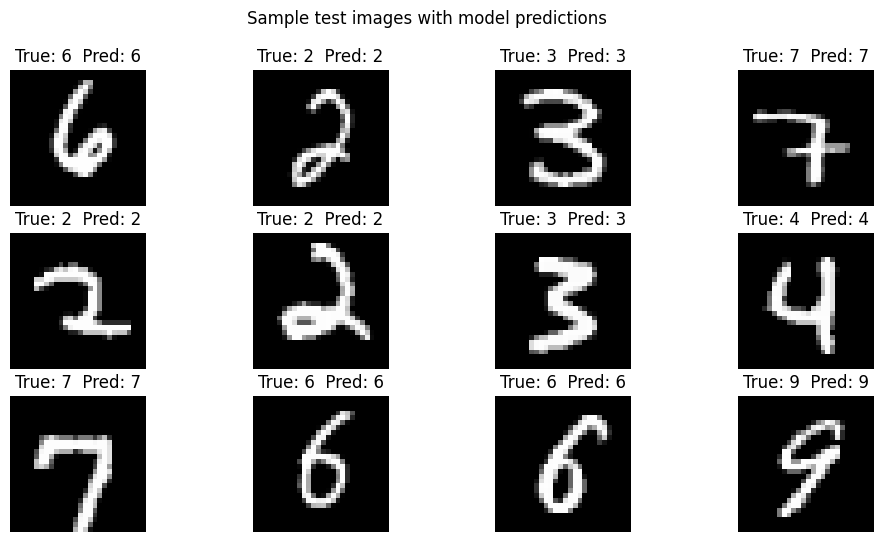

In [ ]:
# 10. Sample test images with predictions
n_show = 12
indices = np.random.choice(len(x_test), n_show, replace=False)
plt.figure(figsize=(12,6))
for i, idx in enumerate(indices):
    plt.subplot(3, 4, i+1)
    plt.imshow(x_test[idx].squeeze(), cmap="gray", vmin=0, vmax=1)
    plt.title(f"True: {y_test[idx]}  Pred: {y_pred[idx]}")
    plt.axis("off")
plt.suptitle("Sample test images with model predictions")
plt.show()